<a href="https://colab.research.google.com/github/tommy-hartanto/rakamin/blob/main/Stage_2_Source_Code_Fantastic_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')
import sys
from imblearn import under_sampling, over_sampling

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.3
pandas version :  1.3.4
seaborn version :  0.11.2


In [ ]:
df = pd.read_csv('bank/train.csv', sep=';')
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 1. Data Cleansing

## A. Handle Missing Values

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Karena tidak ada missing, maka tidak ada tindak lanjut

## B. Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

Tidak ditemukan adanya data terduplikasi

## C. Handle Outliers

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

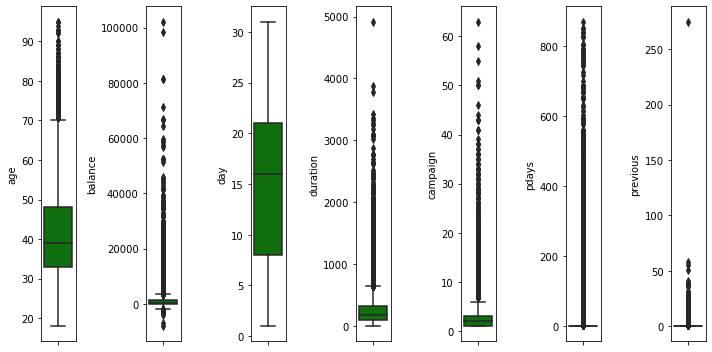

In [ ]:
plt.figure(figsize=(10,5))
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

### Column 'age'

<AxesSubplot:xlabel='age', ylabel='Density'>

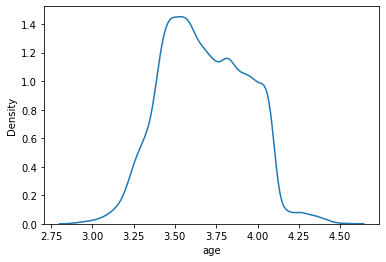

In [ ]:
sns.kdeplot(np.log(df['age']))

In [ ]:
age_zscore = np.abs(stats.zscore(df['age']))
age_filter = (age_zscore < 3)

len_df = int(len(df))
print(f'Jumlah baris sebelum memfilter outlier kolom age: {len_df}')
df = df[age_filter]
print(f'Jumlah baris setelah memfilter outlier kolom age dengan z-score: {len(df)} atau berkurang {round((len_df - df.shape[0])/45211*100, 2)}%')

Jumlah baris sebelum memfilter outlier kolom age: 45211
Jumlah baris setelah memfilter outlier kolom age dengan z-score: 44830 atau berkurang 0.84%


### Column 'balance'

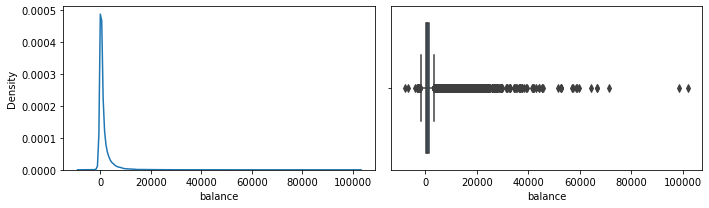

In [ ]:
#keadaan awal
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.kdeplot(df['balance'])
plt.subplot(1, 2, 2)
sns.boxplot(df['balance'])
plt.tight_layout()

In [ ]:
#Menggunakan IQR karena terdapat dua puncak 
Q1 = df['balance'].quantile(0.25) 
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['balance'] >= low_limit) & (df['balance'] <= high_limit))

len_df = int(len(df))
print(f'Jumlah baris sebelum memfilter outlier kolom balance: {len_df}')
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier kolom balance dengan IQR: {len(df)} atau berkurang {round((len_df - df.shape[0])/45211*100, 2)}%')

Jumlah baris sebelum memfilter outlier kolom balance: 44830
Jumlah baris setelah memfilter outlier kolom balance dengan IQR: 40121 atau berkurang 10.42%


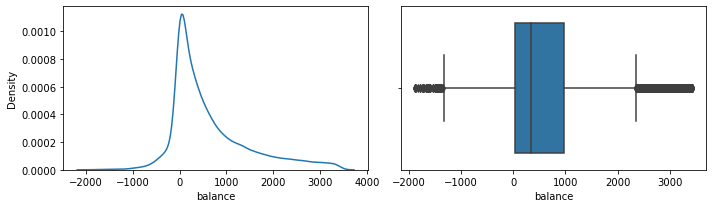

In [ ]:
#sesudah
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.kdeplot(df['balance'])
plt.subplot(1, 2, 2)
sns.boxplot(df['balance'])
plt.tight_layout()

### Column 'duration'

<AxesSubplot:xlabel='duration', ylabel='Density'>

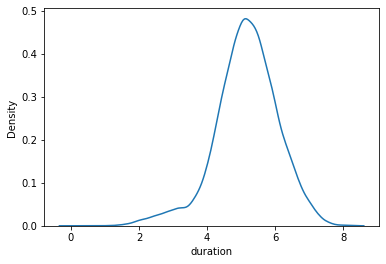

In [ ]:
# distribusi duration (setelah log transformation)
sns.kdeplot(np.log(df['duration']))

In [ ]:
df['log_duration'] = np.log(df['duration'] + sys.float_info.epsilon)

In [ ]:
df = df.drop(columns='duration')

In [ ]:
nums_updated = ['age', 'balance', 'day', 'log_duration', 'campaign', 'pdays', 'previous']

In [ ]:
duration_zscore = np.abs(stats.zscore(df['log_duration']))
duration_filter = (duration_zscore < 3)

len_df = int(len(df))
print(f'Jumlah baris sebelum memfilter outlier kolom duration: {len_df}')
df = df[duration_filter]
print(f'Jumlah baris setelah memfilter outlier kolom duration dengan z-score: {len(df)} atau berkurang {round((len_df - df.shape[0])/45211*100, 2)}%')

Jumlah baris sebelum memfilter outlier kolom duration: 40121
Jumlah baris setelah memfilter outlier kolom duration dengan z-score: 39802 atau berkurang 0.71%


### Column 'campaign'

<AxesSubplot:xlabel='campaign', ylabel='Density'>

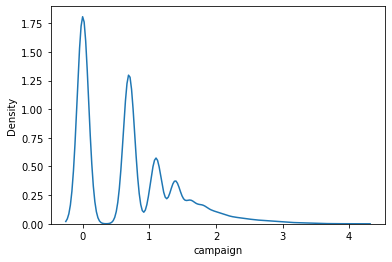

In [ ]:
sns.kdeplot(np.log(df['campaign']))

In [ ]:
df['log_campaign'] = np.log(df['campaign'] + sys.float_info.epsilon)
df = df.drop(columns = 'campaign')

In [ ]:
len_df = int(len(df))
print(f'Jumlah baris sebelum memfilter outlier kolom campaign: {len_df}')

campaign_zscore = np.abs(stats.zscore(df['log_campaign']))
campaign_filter = (campaign_zscore < 3)
df = df[campaign_filter]

print(f'Jumlah baris setelah memfilter outlier kolom campaign dengan z-score: {len(df)} atau berkurang {round((len_df - df.shape[0])/45211*100, 2)}%')

Jumlah baris sebelum memfilter outlier kolom campaign: 39802
Jumlah baris setelah memfilter outlier kolom campaign dengan z-score: 39477 atau berkurang 0.72%


## D. Feature Transformation

### Normalization

Tidak ada kolom yang dinormalisasi

### Standardization

#### Column 'age', 'duration', 'campaign'

In [ ]:
df['age_std'] = StandardScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['log_duration_std'] = StandardScaler().fit_transform(df['log_duration'].values.reshape(len(df), 1))
df['log_campaign_std'] = StandardScaler().fit_transform(df['log_campaign'].values.reshape(len(df), 1))

In [ ]:
df.drop(columns=['age', 'log_duration', 'log_campaign'], inplace=True)

In [ ]:
df.columns

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'pdays', 'previous', 'poutcome', 'y',
       'age_std', 'log_duration_std', 'log_campaign_std'],
      dtype='object')

## E. Feature Encoding

### Label Encoding

#### Column 'default'

In [ ]:
df['default'] = df['default'].map({'yes': 1, 'no': 0})

#### Column 'loan'

In [ ]:
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

#### Column 'housing'

In [ ]:
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})

#### Column 'education'

In [ ]:
mapping_education = {
    'unknown' : 0,
    'primary' : 1,
    'secondary' : 2,
    'tertiary' : 3
}
df['education'] = df['education'].map(mapping_education)

#### Column 'month'

In [ ]:
mapping_month = {
    'jan' : 0,
    'feb' : 1,
    'mar' : 2,
    'apr' : 3,
    'may' : 4,
    'jun' : 5,
    'jul' : 6,
    'aug' : 7,
    'sep' : 8,
    'oct' : 9,
    'nov' : 10,
    'dec' : 11
}
df['month'] = df['month'].map(mapping_month)

#### Column 'y'

In [ ]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

### OHE

#### Column 'job', 'marital', 'contact', 'poutcome'

In [ ]:
for cats in ['job', 'marital', 'contact', 'poutcome']:
    onehots = pd.get_dummies(df[cats], prefix=cats)
    df = df.join(onehots)

In [ ]:
df = df.drop(columns=['job', 'marital', 'contact', 'poutcome'])

In [ ]:
df.head()

,education,default,balance,housing,loan,day,month,pdays,previous,y,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,3,0,2143,1,0,5,4,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,2,0,29,1,0,5,4,-1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,0,2,1,1,5,4,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1506,1,0,5,4,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,1,0,0,5,4,-1,0,0,...,0,0,1,0,0,1,0,0,0,1


## F. Handle class imbalance

In [ ]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['y']]]
y = df['y'].values
print(X.shape)
print(y.shape)

(39477, 34)
(39477,)


In [ ]:
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [ ]:
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    35100
1    17550
dtype: int64


# 2. Feature Engineering

## Feature Selection

### Column 'pdays'

<AxesSubplot:xlabel='pdays', ylabel='Density'>

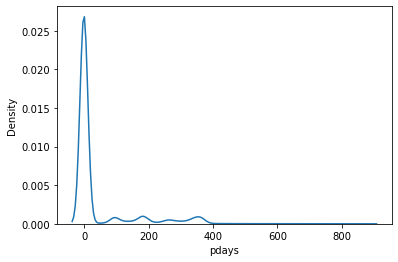

In [ ]:
sns.kdeplot(df['pdays'])

Karena mayoritas belum pernah dikontak, maka kolom pdays tidak akan relevan terhadap model.
Jika data bernilai -1 saja yang di-drop, maka persentase data yang hilang melebihi 75%, sehingga kolom pdays di-drop.

### Column 'previous'

<AxesSubplot:xlabel='previous', ylabel='Density'>

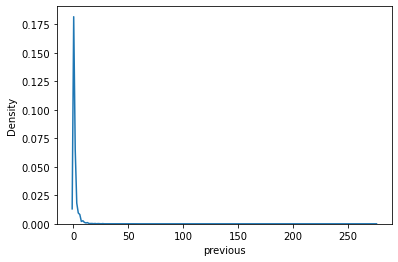

In [ ]:
sns.kdeplot(df['previous'])

Sama seperti pdays bahwa mayoritas belum pernah dikontak, sehingga tidak akan relevan terhadap model.
Jika data bernilai 0 saja yang di-drop, maka persentase data yang hilang melebihi 75%, sehingga kolom previous di-drop

## Feature Extraction

Tidak ada feature yang bisa di-extract

## 4 Feature Tambahan

- Rata-rata saldo per bulan
- Kota tempat tinggal
- Penghasilan tahunan
- Credit score